![PPGI_UFRJ](imagens/ppgi-ufrj.png)
# Fundamentos de Ciência de Dados

---
[![DOI](https://zenodo.org/badge/335308405.svg)](https://zenodo.org/badge/latestdoi/335308405)


---
# PPGI/UFRJ 2025.2
## Prof Sergio Serra e Jorge Zavaleta

---
## Aplicações de Lógica Fuzzy para Analise de sentimentos

===== Dataset em Português =====
                                               texto label
0  ALERTA! Remédio caseiro cura CÂNCER em 3 dias!...  fake
1  O tempo hoje estará parcialmente nublado, com ...  real
2  Descubra o segredo PROIBIDO que celebridades u...  fake
3  Segundo o IBGE, a inflação do mês foi de 0,45%...  real
4  VOCÊ NÃO VAI ACREDITAR no que aconteceu com es...  fake


=== Características extraídas (PT-BR) ===
                                               texto  polaridade  \
0  ALERTA! Remédio caseiro cura CÂNCER em 3 dias!...         1.0   
1  O tempo hoje estará parcialmente nublado, com ...         0.0   
2  Descubra o segredo PROIBIDO que celebridades u...        -1.0   
3  Segundo o IBGE, a inflação do mês foi de 0,45%...         0.0   
4  VOCÊ NÃO VAI ACREDITAR no que aconteceu com es...         0.0   

   subjetividade  
0           0.08  
1           0.00  
2           0.20  
3           0.00  
4           0.17  


=== Gráficos da Variável Fuzzy: Polaridade =

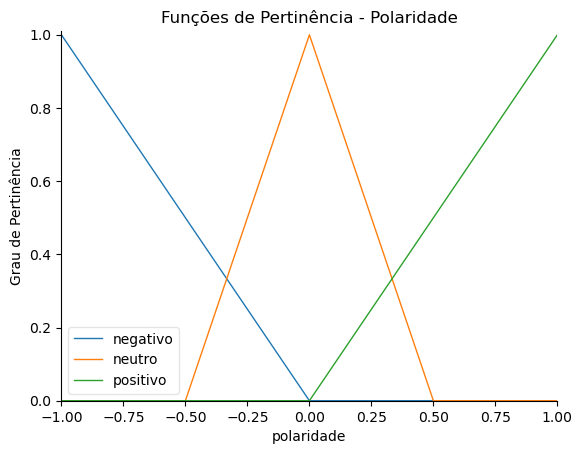

=== Gráficos da Variável Fuzzy: Subjetividade ===


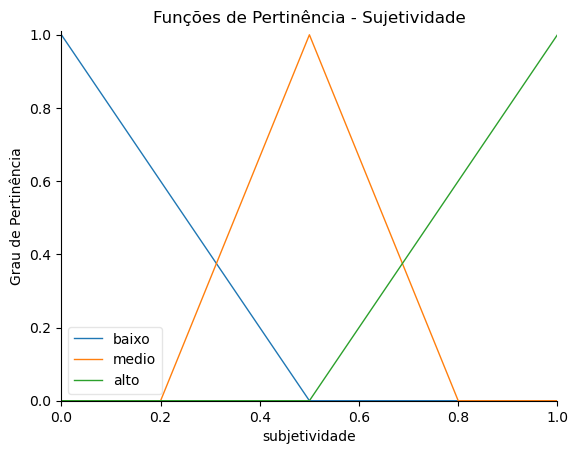

=== Gráficos da Variável Fuzzy: Grau da fake-news ===


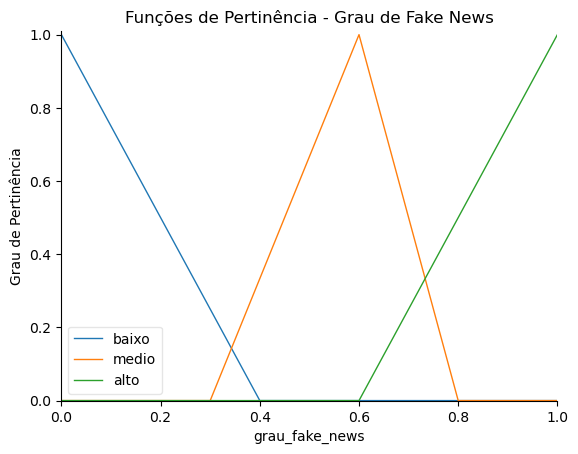

=== Visualização das Regras Fuzzy Definidas ===
=== Visualizando as Regras Fuzzy Definidas ===
Regra 1: IF polaridade[negativo] AND subjetividade[alto] THEN grau_fake_news[alto]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 2: IF polaridade[positivo] AND subjetividade[alto] THEN grau_fake_news[alto]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 3: IF polaridade[neutro] AND subjetividade[baixo] THEN grau_fake_news[baixo]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 4: IF polaridade[neutro] AND subjetividade[alto] THEN grau_fake_news[medio]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Regra 5: IF subjetividade[medio] THEN grau_fake_news[medio]
	AND aggregation function : fmin
	OR aggregation function  : fmax


=== Visualização gráfica do Resultado Fuzzy ===


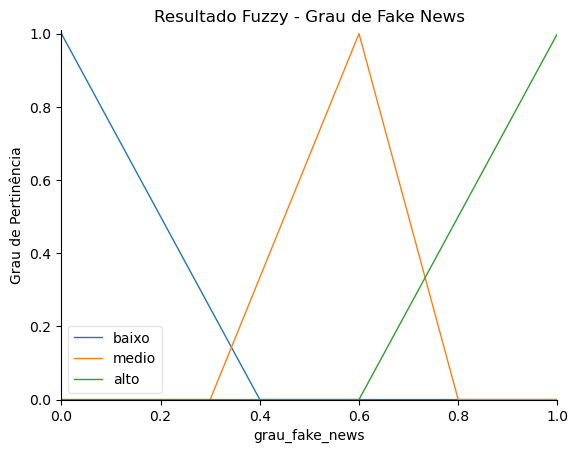

=== Visualização gráfica do Resultado Fuzzy ===


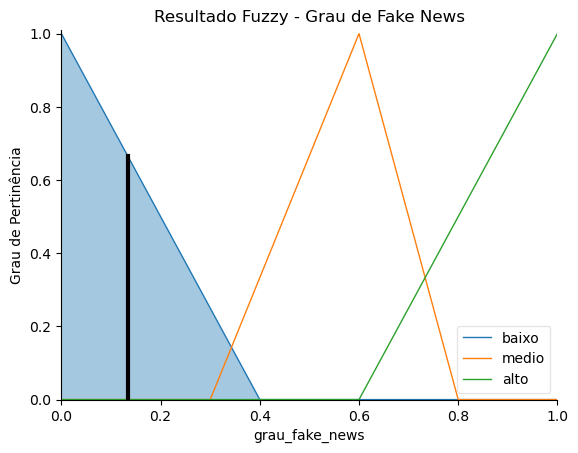

=== Visualização gráfica do Resultado Fuzzy ===


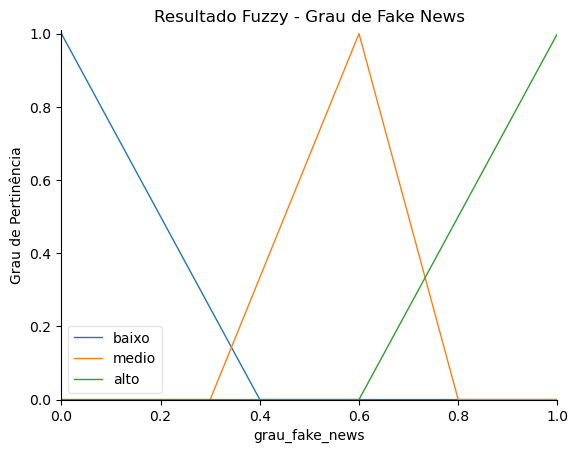

=== Visualização gráfica do Resultado Fuzzy ===


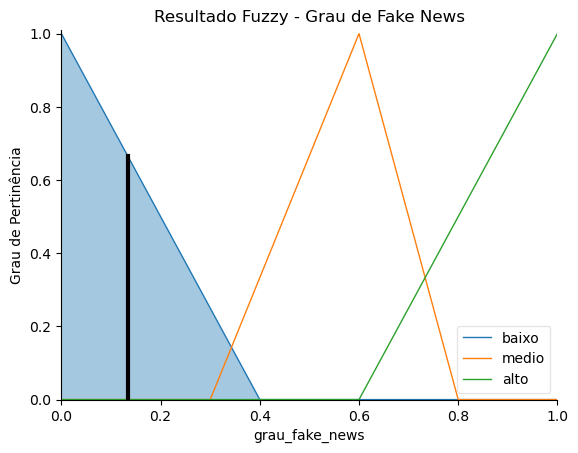

=== Visualização gráfica do Resultado Fuzzy ===


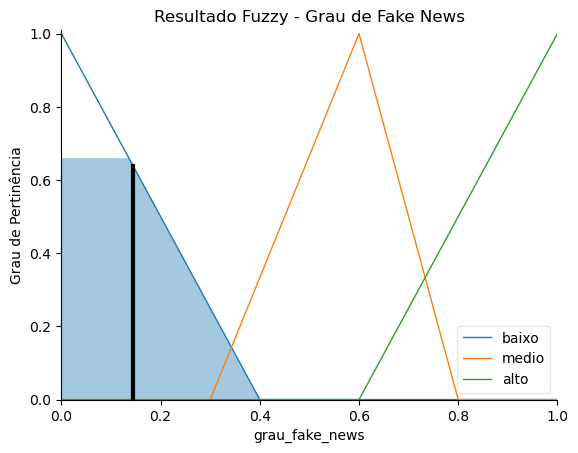

=== Resultados da Análise Fuzzy (Português) ===
                                               texto  polaridade  \
0  ALERTA! Remédio caseiro cura CÂNCER em 3 dias!...         1.0   
1  O tempo hoje estará parcialmente nublado, com ...         0.0   
2  Descubra o segredo PROIBIDO que celebridades u...        -1.0   
3  Segundo o IBGE, a inflação do mês foi de 0,45%...         0.0   
4  VOCÊ NÃO VAI ACREDITAR no que aconteceu com es...         0.0   

   subjetividade  fake_score predicao label  
0           0.08        0.50     fake  fake  
1           0.00        0.13     real  real  
2           0.20        0.50     fake  fake  
3           0.00        0.13     real  real  
4           0.17        0.14     real  fake  




🔍 Interpretação (em português):
- Notícias com linguagem sensacionalista (ex: 'ALERTA!', 'PROIBIDO', 'VOCÊ NÃO VAI ACREDITAR')
  apresentam alta subjetividade, aumentando o grau de 'fake news'.
- Mesmo que o sentimento seja positivo (ex: 'cura milagrosa'), a comb

,texto,label,polaridade,subjetividade,fake_score,predicao
0,ALERTA! Remédio caseiro cura CÂNCER em 3 dias!...,fake,1.0,0.08,0.50,fake
1,"O tempo hoje estará parcialmente nublado, com ...",real,0.0,0.00,0.13,real
2,Descubra o segredo PROIBIDO que celebridades u...,fake,-1.0,0.20,0.50,fake
3,"Segundo o IBGE, a inflação do mês foi de 0,45%...",real,0.0,0.00,0.13,real
4,VOCÊ NÃO VAI ACREDITAR no que aconteceu com es...,fake,0.0,0.17,0.14,real


In [1]:
# exemplo de aplicação de lógica fuzzy para análise de sentimentos em notícias falsas (fake news) em português
"""
Análise de Sentimentos em Fake News em PORTUGUÊS usando Lógica Fuzzy (scikit-fuzzy)

Objetivo: Classificar notícias em português como "provavelmente falsas" com base em:
  - Polaridade do sentimento (calculada com léxico em PT-BR)
  - Subjetividade (proporção de palavras subjetivas: adjetivos, advérbios, exclamações)

Saída fuzzy: grau de "FakeNews" (0 a 1)

Autores: Prof. Dr. Jorge Zavaleta & Prof. Dr. Sergio Serra
email: zvaleta.jorge@gmail.com, sergioserra@ic.ufrj.br
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import re
import warnings
warnings.filterwarnings("ignore")

# =============================================================================
# 1. Dicionários de Sentimento em Português (simplificados para exemplo)
# =============================================================================
# Fontes: adaptado de léxicos públicos como OpLexicon, SentiLex, etc.
PALAVRAS_POSITIVAS = {
    'ótimo', 'bom', 'excelente', 'maravilhoso', 'incrível', 'fantástico',
    'verdade', 'comprovado', 'científico', 'oficial', 'seguro', 'confiável',
    'sucesso', 'milagre', 'grátis', 'exclusivo', 'imperdível', 'urgente'
}

PALAVRAS_NEGATIVAS = {
    'horrível', 'péssimo', 'terrível', 'falso', 'mentira', 'golpe',
    'alarmante', 'perigoso', 'escândalo', 'revelação chocante', 'proibido',
    'morte', 'doença', 'vírus', 'ataque', 'destruição', 'colapso'
}

# Palavras subjetivas comuns em fake news (sensacionalismo)
PALAVRAS_SUBJETIVAS = {
    'você', 'não vai acreditar', 'imperdível', 'exclusivo', 'chocante',
    'segredo', 'proibido', 'misterioso', 'incrível', 'milagroso', 'urgente',
    'agora', 'atualização', 'atenção', 'alerta', 'finalmente', 'só hoje'
}

# =============================================================================
# 2. Função de Análise de Sentimento em Português
# =============================================================================
def analisar_sentimento_pt(texto):
    """
    Retorna polaridade e subjetividade com base em léxico em português.
    
    Polaridade: [-1, 1]
      - Contagem de palavras positivas e negativas
    Subjetividade: [0, 1]
      - Proporção de palavras subjetivas (sensacionalistas)
    """
    # Normalização do texto para minúsculas
    texto = texto.lower()
    # remove pontuação do texto
    texto = re.sub(r'[^\w\s]', ' ', texto)
    # Tokenização simples em uma lista de palavras
    palavras = texto.split()

    if not palavras:
        return 0.0, 0.0

    # Contagem de polaridade encontradas no texto
    positivas = sum(1 for p in palavras if p in PALAVRAS_POSITIVAS)
    negativas = sum(1 for p in palavras if p in PALAVRAS_NEGATIVAS)

    # Polaridade normalizada
    if positivas + negativas == 0:
        polaridade = 0.0
    else:
        polaridade = (positivas - negativas) / (positivas + negativas)

    # Subjetividade: palavras sensacionalistas
    subjetivas = sum(1 for p in palavras if p in PALAVRAS_SUBJETIVAS)
    subjetividade = min(subjetivas / len(palavras), 1.0)

    # Ajuste: notícias com muitas exclamações ou maiúsculas são mais subjetivas
    if '!' in texto or texto.isupper():
        subjetividade = min(subjetividade + 0.2, 1.0)

    return round(polaridade, 2), round(subjetividade, 2)

# =============================================================================
# 3. Leitura do Dataset em Português (exemplo sintético)
# =============================================================================
data = {
    'texto': [
        "ALERTA! Remédio caseiro cura CÂNCER em 3 dias! Médicos escondem a verdade!",
        "O tempo hoje estará parcialmente nublado, com temperatura máxima de 26°C.",
        "Descubra o segredo PROIBIDO que celebridades usam para emagrecer rápido!",
        "Segundo o IBGE, a inflação do mês foi de 0,45%, dentro da expectativa.",
        "VOCÊ NÃO VAI ACREDITAR no que aconteceu com essa criança! Clique agora!"
    ],
    'label': ['fake', 'real', 'fake', 'real', 'fake']
}

df = pd.DataFrame(data)
print("===== Dataset em Português =====")
print(df[['texto', 'label']])
print("\n")
# visualiza as 5 primeiras linhas do dataframe
df.head(5)

# =============================================================================
# 4. Extração de Características (Polaridade e Subjetividade em PT)
# =============================================================================
df[['polaridade', 'subjetividade']] = df['texto'].apply(
    lambda x: pd.Series(analisar_sentimento_pt(x))
)

print("=== Características extraídas (PT-BR) ===")
print(df[['texto', 'polaridade', 'subjetividade']])
print("\n")
df.head(5)

# =============================================================================
# 5. Sistema Fuzzy com scikit-fuzzy
# =============================================================================
# Definição das variáveis fuzzy - plaridade
polarity = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'polaridade')
# definição das variáveis fuzzy - subjetividade
subjectivity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'subjetividade')
# definição da variável fuzzy de saída - grau de fake news
fake_news_degree = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'grau_fake_news')

print("=== Gráficos da Variável Fuzzy: Polaridade ===")
# Funções de pertinência polatidade negativa
polarity['negativo'] = fuzz.trimf(polarity.universe, [-1, -1, 0])
# Funções de pertinência polatidade neutra
polarity['neutro'] = fuzz.trimf(polarity.universe, [-0.5, 0, 0.5])
# Funções de pertinência polatidade positiva
polarity['positivo'] = fuzz.trimf(polarity.universe, [0, 1, 1])
# visualização das funções de pertinência polaridade
polarity.view()
plt.title('Funções de Pertinência - Polaridade')
plt.ylabel('Grau de Pertinência')
plt.show()
print("=== Gráficos da Variável Fuzzy: Subjetividade ===")
# Funções de pertinência subjetividade
subjectivity['baixo'] = fuzz.trimf(subjectivity.universe, [0, 0, 0.5])
subjectivity['medio'] = fuzz.trimf(subjectivity.universe, [0.2, 0.5, 0.8])
subjectivity['alto'] = fuzz.trimf(subjectivity.universe, [0.5, 1, 1])
# visualização das funções de pertinência subjetividade
subjectivity.view()
plt.title('Funções de Pertinência - Sujetividade')
plt.ylabel('Grau de Pertinência')
plt.show()
print("=== Gráficos da Variável Fuzzy: Grau da fake-news ===")
# Funções de pertinência grau de fake news
fake_news_degree['baixo'] = fuzz.trimf(fake_news_degree.universe, [0, 0, 0.4])
fake_news_degree['medio'] = fuzz.trimf(fake_news_degree.universe, [0.3, 0.6, 0.8])
fake_news_degree['alto'] = fuzz.trimf(fake_news_degree.universe, [0.6, 1, 1])
# visualização das funções de pertinência grau de fake news
fake_news_degree.view()
plt.title('Funções de Pertinência - Grau de Fake News')
plt.ylabel('Grau de Pertinência')
plt.show()

# Regras fuzzy
# rule1 = Se polaridade é negativo E subjetividade é alto ENTÃO grau de fake news é alto
# rule2 = Se polaridade é positivo E subjetividade é alto ENTÃO grau de fake news é alto
# rule3 = Se polaridade é neutro E subjetividade é baixo ENTÃO grau de fake news é baixo
# rule4 = Se polaridade é neutro E subjetividade é alto ENTÃO grau de fake news é médio
# rule5 = Se subjetividade é médio ENTÃO grau de fake news é médio
#
rule1 = ctrl.Rule(polarity['negativo'] & subjectivity['alto'], fake_news_degree['alto'])
rule2 = ctrl.Rule(polarity['positivo'] & subjectivity['alto'], fake_news_degree['alto'])
rule3 = ctrl.Rule(polarity['neutro'] & subjectivity['baixo'], fake_news_degree['baixo'])
rule4 = ctrl.Rule(polarity['neutro'] & subjectivity['alto'], fake_news_degree['medio'])
rule5 = ctrl.Rule(subjectivity['medio'], fake_news_degree['medio'])

# visualização das regras fuzzy
print("=== Visualização das Regras Fuzzy Definidas ===")
#rule2.view()
#plt.show()
#print("\n")

# sistema de controle e simulação fuzzy
fake_news_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
fake_news_sim = ctrl.ControlSystemSimulation(fake_news_ctrl)

# Visualizando as regras individualmente (impressão textual)
print("=== Visualizando as Regras Fuzzy Definidas ===")
for i, rule in enumerate(fake_news_ctrl.rules):
    print(f"Regra {i+1}: {rule}")
print('\n')

# =============================================================================
# Função para visualizar o resultado fuzzy
# =============================================================================
def visualizar(dg):
    print("=== Visualização gráfica do Resultado Fuzzy ===")
    fake_news_degree.view(sim=dg)
    plt.title('Resultado Fuzzy - Grau de Fake News')
    plt.ylabel('Grau de Pertinência')
    plt.show()  
# =============================================================================
# 6. Aplicação do Sistema Fuzzy
# =============================================================================
def classify_fake_news(p, s):
    try:
        fake_news_sim.input['polaridade'] = p
        fake_news_sim.input['subjetividade'] = s
        # calcular o resultado fuzzy
        fake_news_sim.compute()
        visualizar(dg=fake_news_sim)
        return fake_news_sim.output['grau_fake_news']
    except Exception as e:
        # Caso de erro (ex: fora do universo), retorna valor neutro
        return 0.5

df['fake_score'] = df.apply(
    lambda row: classify_fake_news(row['polaridade'], row['subjetividade']), axis=1)
df['fake_score'] = df['fake_score'].round(2)
df['predicao'] = df['fake_score'].apply(lambda x: 'fake' if x >= 0.5 else 'real')

# =============================================================================
# 7. Resultados e Interpretação
# =============================================================================
print("=== Resultados da Análise Fuzzy (Português) ===")
print(df[['texto', 'polaridade', 'subjetividade', 'fake_score', 'predicao', 'label']])
print("\n")
df.head(5)
print("\n")
print("🔍 Interpretação (em português):")
print("- Notícias com linguagem sensacionalista (ex: 'ALERTA!', 'PROIBIDO', 'VOCÊ NÃO VAI ACREDITAR')")
print("  apresentam alta subjetividade, aumentando o grau de 'fake news'.")
print("- Mesmo que o sentimento seja positivo (ex: 'cura milagrosa'), a combinação com alta subjetividade")
print("  indica possível desinformação.")
print("- Notícias neutras e objetivas (ex: dados do IBGE) recebem baixa pontuação.")
print("\n✅ Acertos:")
print(df[df['label'] == df['predicao']][['texto', 'label', 'predicao']])
df.head(5)

---
Fundamentos para Ciência Dados © Copyright 2025.2, Sergio Serra & Jorge Zavaleta